<a href="https://colab.research.google.com/github/bysxx/data_mining/blob/main/linear_regression_0329.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q.1** 

Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

**A.**

유의수준이 따로 정해져 있는 것은 아니나 TV, radio는 p-value가 매우 낮아 Sales와 관계가 없다는 귀무가설을 기각해 관계가 있을 가능성이 높고 newspaper는 귀무가설을 기각하지 못한다

**Q.3**

Suppose we have a data set with five predictors, X1 = GPA, X2 = IQ,

X3 = Gender (1 for Female and 0 for Male), X4 = Interaction between

GPA and IQ, and X5 = Interaction between GPA and Gender. The

response is starting salary after graduation (in thousands of dollars).

Suppose we use least squares to fit the model, and get ˆβ0 = 50 , ˆβ1 =

20, ˆβ2 = 0 .07, ˆβ3 = 35 , ˆβ4 = 0 .01, ˆβ5 = −10.

(a) Which answer is correct, and why?

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

(b) Predict the salary of a female with IQ of 110 and a GPA of 4.0.

(c) True or false: Since the coefficient for the GPA/IQ interaction term is very small, there is very little evidence of an interaction effect. Justify your answer

```jsx
def f(gpa, iq, gender):
    return 50 + 20*gpa + 0.07*iq + 35*gender + 0.01*gpa*iq + (-10*gpa*gender)
```

**A.**

(a) 정답은 iii로 GPA가 충분히 높다면 GPA와 gender의 상호작용 때문에 남자의 초봉이 더 높게 나타난다

(b) 식에 gpa: 4.0, iq:110, gender: 1을 대입하면 

50 + 20 * 4 + 0.07 * 110 + 35 * 1 + 0.01 * 4 * 110 + (-10) * 4 * 1  = 137.1

137.1에 1000을 곱해 답은 $137100.0이다

(c) 단순히 계수가 작다고해서  significance등을 고려해야하기 때문에 관계가 없다고 단정지을 수 없다.

**Q.11**
this problem we will investigate the t-statistic for the null hypoth-esis H0 : β= 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

```
set.seed (1) 
x=rnorm (100) 
y=2*x+rnorm (100)
```

<Axes: >

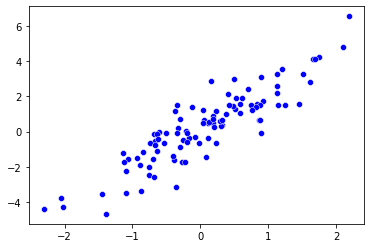

In [21]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

np.random.seed(1)

x = np.random.normal(size=100)
y = 2*x + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})
sns.scatterplot(x=x, y=y, color="b")

In [22]:
import statsmodels.api as sm

# a
model_yx = sm.OLS(y, x).fit()
print(model_yx.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                    3.46e-36
Time:                        02:22:49   Log-Likelihood:                         -135.67
No. Observations:                 100   AIC:                                      273.3
Df Residuals:                      99   BIC:                                      275.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
# b
model_xy = sm.OLS(x, y).fit()
print(model_xy.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                              391.7
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                    3.46e-36
Time:                        02:22:49   Log-Likelihood:                         -49.891
No. Observations:                 100   AIC:                                      101.8
Df Residuals:                      99   BIC:                                      104.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

(c)

(a)와 (b)의 결과 사이의 관계는 귀무가설(H0: β = 0)에 대한 t-검정 결과에 대한 것으로, 두 경우에서 t-검정 통계량과 p-값은 동일하다.

In [24]:
# d
import numpy as np

# 데이터 생성
x = np.array([5, 7, 9, 11, 13])
y = np.array([11, 13, 15, 17, 19])
n = len(x)

# 회귀분석 결과
beta_hat = np.sum(x * y) / np.sum(x ** 2)
se_beta_hat = np.sqrt(np.sum((y - beta_hat * x) ** 2) / (n - 1) / np.sum((x - np.mean(x)) ** 2))
t_stat = beta_hat / se_beta_hat
print("t-statistic: ", t_stat)

t-statistic:  5.05265656136365


In [25]:
# e
import numpy as np
import pandas as pd
import statsmodels.api as sm

# 데이터 생성
x = np.array([5, 7, 9, 11, 13])
y = np.array([11, 13, 15, 17, 19])
n = len(x)

# 회귀분석 모델 적합
model = sm.OLS(y, sm.add_constant(x))
result = model.fit()

# 결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.089e+29
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           8.43e-45
Time:                        02:22:49   Log-Likelihood:                 155.42
No. Observations:                   5   AIC:                            -306.8
Df Residuals:                       3   BIC:                            -307.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.0000   1.48e-14   4.07e+14      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


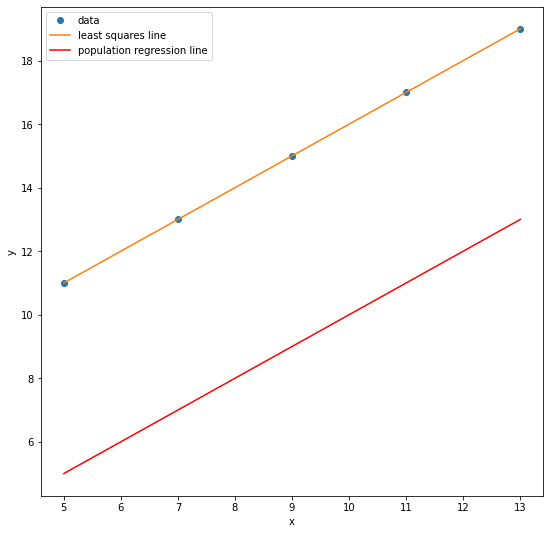

In [26]:
# f
plt.figure(figsize=(9, 9))

beta_1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)

# x와 y의 최소 제곱 회귀선 계수 계산
b1, b0 = np.polyfit(x, y, deg=1)

# x 범위에서의 최소 제곱 회귀선 계산
x_plot = np.array([np.min(x), np.max(x)])
y_plot = b0 + b1 * x_plot

# x축과 y축 이름 설정
plt.xlabel("x")
plt.ylabel("y")

# 산점도 그래프와 최소 제곱 회귀선 함께 그리기
plt.plot(x, y, 'o', label="data")
plt.plot(x_plot, y_plot, label="least squares line")

# 모집단 회귀선 그리기
plt.plot(x_plot, beta_1*x_plot, 'r', label="population regression line")

# 범례 추가
plt.legend(loc="upper left")

13. In this exercise you will create some simulated data and will fit simple linear regression models to it. Make sure to use set.seed(1) prior to starting part (a) to ensure consistent results.

In [27]:
# 13-(a)
np.random.seed(1)
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

In [28]:
mu, sigma = 0, 0.5
eps = np.random.normal(loc=0, scale=0.5, size=100)

In [29]:
#(c)
y = -1 + 0.5*x + eps
beta_0 = -1
beta_1 = 0.5
print('y length: ' + str(np.linalg.norm(y)))

y length: 11.173260452749581


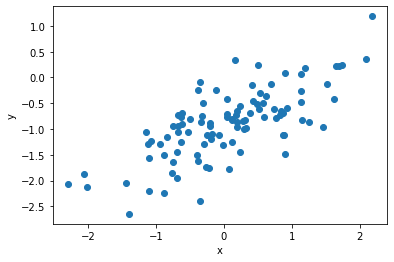

In [30]:
# d
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [31]:
# e
import statsmodels.formula.api as smf

model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.20e-17
Time:                        02:22:51   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265      0.047    -19.717      0.0

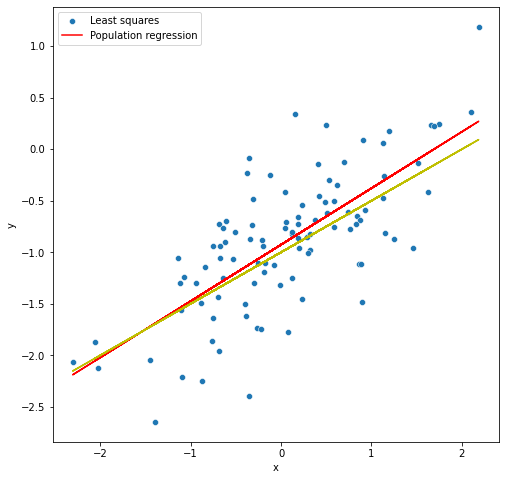

In [32]:
# f
y_pred = model.predict()
y_act  = -1+(0.5*x)

plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     52.96
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.83e-16
Time:                        02:27:31   Log-Likelihood:                -65.107
No. Observations:                 100   AIC:                             136.2
Df Residuals:                      97   BIC:                             144.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.9325      0.058    -16.158   

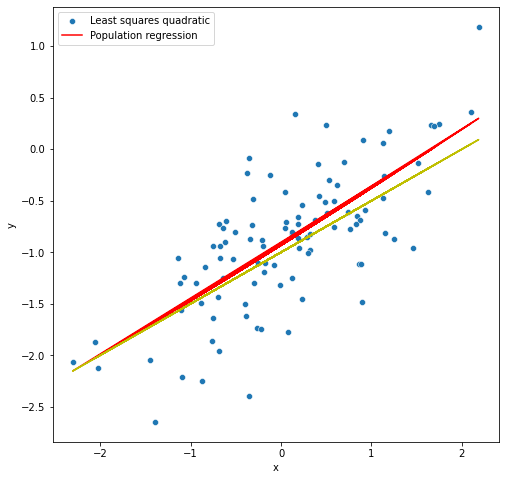

In [34]:
# g
f = 'y ~ x + np.square(x)'
model = smf.ols(formula=f, data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

# predict
y_pred = model.predict()
y_act  = -1+(0.5*x)

# plot
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares quadratic', 'Population regression'])

p-value > 0.05로 통계적 유의미하지 않으며
R-squared값은 0.68로

모델을 개선한다고 할 수 없다

y length: 10.617729160380613
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9084.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           1.97e-98
Time:                        02:31:11   Log-Likelihood:                 165.13
No. Observations:                 100   AIC:                            -326.3
Df Residuals:                      98   BIC:                            -321.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9926  

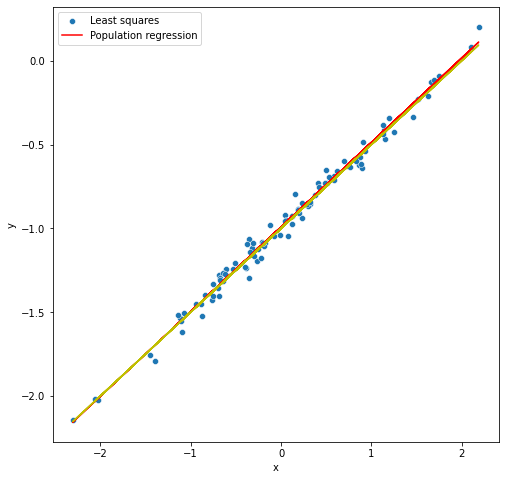

In [35]:
# h
np.random.seed(1)

# generate x
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

# generate epsilon
mu, sigma = 0, 0.05
eps = np.random.normal(mu, sigma, 100)

# generate y
y = -1 + 0.5*x + eps
print('y length: ' + str(np.linalg.norm(y)))

# Fit model
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

# Make predictions
y_pred = model.predict()
y_act  = -1+(0.5*x)

# Plot results
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);

y length: 11.173260452749581
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     107.0
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           2.20e-17
Time:                        02:34:16   Log-Likelihood:                -65.124
No. Observations:                 100   AIC:                             134.2
Df Residuals:                      98   BIC:                             139.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9265  

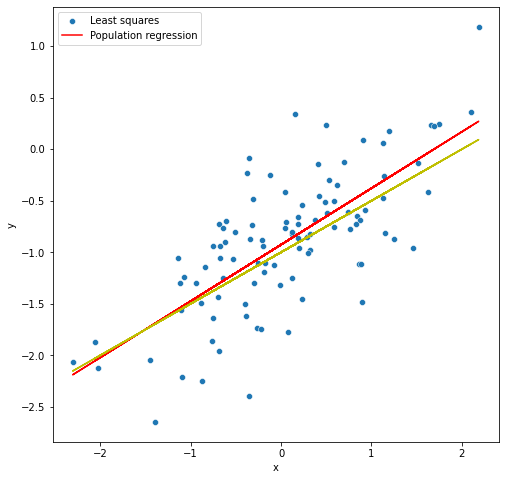

In [36]:
# i
np.random.seed(1)

# generate x
mu, sigma = 0, 1
x = np.random.normal(mu, sigma, 100)

# generate epsilon
mu, sigma = 0, 0.5
eps = np.random.normal(mu, sigma, 100)

# generate y
y = -1 + 0.5*x + eps
print('y length: ' + str(np.linalg.norm(y)))

# Fit model
model = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()
print(model.summary())

# Make predictions
y_pred = model.predict()
y_act  = -1+(0.5*x)

# Plot results
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y')
ax.plot(x, model.predict(), color='r')
ax.plot(x, -1+(0.5*x), color='y')
ax.legend(['Least squares', 'Population regression']);

h: 노이즈를 줄여 R-squared 값이 감소(성능 강화)
i: 노이즈를 늘려 R-squared 값이 증가(성능 약화)

In [ ]:
# j
# original data set에 대한 회귀분석 결과
model1 = smf.ols(formula='y ~ x', data=pd.DataFrame({'x':x, 'y':y})).fit()

# noisier data set에 대한 회귀분석 결과
np.random.seed(1)
mu, sigma = 0, 0.5
eps = np.random.normal(mu, sigma, 100)
y_noisy = -1 + 0.5 * x + eps
model2 = smf.ols(formula='y_noisy ~ x', data=pd.DataFrame({'x':x, 'y_noisy':y_noisy})).fit()

# less noisy data set에 대한 회귀분석 결과
np.random.seed(1)
mu, sigma = 0, 0.05
eps = np.random.normal(mu, sigma, 100)
y_less_noisy = -1 + 0.5 * x + eps
model3 = smf.ols(formula='y_less_noisy ~ x', data=pd.DataFrame({'x':x, 'y_less_noisy':y_less_noisy})).fit()

# 각각의 회귀분석 결과에 대한 confidence interval 출력
print('Original: beta_0: {:.3f}, {:.3f} ; beta_1: {:.3f}, {:.3f}'.format(*model1.conf_int(alpha=0.05).values.flatten()))
print('Noisier: beta_0: {:.3f}, {:.3f} ; beta_1: {:.3f}, {:.3f}'.format(*model2.conf_int(alpha=0.05).values.flatten()))
print('Less Noisy: beta_0: {:.3f}, {:.3f} ; beta_1: {:.3f}, {:.3f}'.format(*model3.conf_int(alpha=0.05).values.flatten()))

분산을 늘리면 신뢰 구간도 커짐